# Plotting notebook
This notebook is intended to show how the circuit work and show the plots

In [2]:
from src.state import State
from src.circuit import Circuit
import numpy as np

L = 4
circuits = []
n_circuits = 300
n_prob = 4
p = np.linspace(0, 1, n_prob)  # Probability of applying a unitary operator
for prob in p:
    for _ in range(n_circuits):
        circuits.append(Circuit(L, prob, State(L)))
# Perform full circuit evolution
circuits = np.array(circuits)
steps = 100
entropies = np.zeros((n_circuits, steps + 1, n_prob))
for l, circuit in enumerate(circuits):
    k = l // n_circuits
    j = l % n_circuits
    entropies[j, 0, k] = circuit.state.entanglement_entropy()
    for i in range(1, steps + 1):
        circuit.full_circuit_evolution(1)
        entropies[j, i, k] = circuit.state.entanglement_entropy()

/home/pablo/projects/master/many_body_physics/project/src/state.py:67: RuntimeWarning: divide by zero encountered in log2
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)
/home/pablo/projects/master/many_body_physics/project/src/state.py:67: RuntimeWarning: invalid value encountered in multiply
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)


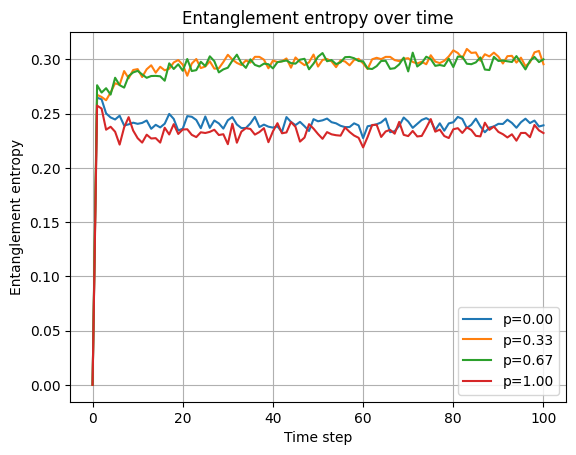

In [3]:
import matplotlib.pyplot as plt

for k in range(n_prob):
    plt.plot(np.average(entropies[:, :, k], axis=0) / L, label=f"p={p[k]:.2f}")
plt.xlabel("Time step")
plt.ylabel("Entanglement entropy")
plt.title("Entanglement entropy over time")
plt.legend()
plt.grid()

In [9]:
np.average(
    entropies[
        :,
        :,
    ],
    axis=0,
) / L

array([[0.        ],
       [0.00188801],
       [0.00158179],
       [0.00152802],
       [0.0016287 ],
       [0.00064378],
       [0.00149998],
       [0.00104301],
       [0.00151644],
       [0.00191525],
       [0.0011947 ],
       [0.00153817],
       [0.00083981],
       [0.00134665],
       [0.00188897],
       [0.00123178],
       [0.00193636],
       [0.00135031],
       [0.001125  ],
       [0.00162951],
       [0.00085843],
       [0.00197141],
       [0.00167568],
       [0.0016802 ],
       [0.00129074],
       [0.00023906],
       [0.00194281],
       [0.00152283],
       [0.00177817],
       [0.0015265 ],
       [0.00057074],
       [0.00164536],
       [0.00089203],
       [0.00170976],
       [0.00183973],
       [0.00111041],
       [0.00134503],
       [0.00045947],
       [0.00165967],
       [0.00182866],
       [0.00116848],
       [0.00179334],
       [0.00104339],
       [0.00129061],
       [0.00152123],
       [0.00108907],
       [0.00197272],
       [0.001

In [ ]:
entropies[0, :, 0]

IndexError: index 1 is out of bounds for axis 2 with size 1